In [46]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from utils import get_score_n_best_consecutive, get_score_n_after_peak

matplotlib.rcParams["figure.dpi"] = 100
pd.set_option('display.max_colwidth', None)
plt.rcParams["figure.figsize"] = (6, 4)
FONTSIZE = 13
FIG_DIR = 'final-figures/'

In [47]:
cl_mode = 'domain'
fixed_lr = 10**(-3.5)

min_accu_eval = False
stop_accu = 0.99

filenames = {
    'DFC-sparse-rec': f'hpconfig_{cl_mode}-mnist-sparse-rec',
    'BP': f'hpconfig_{cl_mode}-split-mnist-bp',
    'EWC': f'hpconfig_{cl_mode}-split-mnist-ewc',
    'SI': f'hpconfig_{cl_mode}-split-mnist-si'
}

lrs = {
    'DFC-sparse-rec': 10**(-3.5) if cl_mode == 'domain' else 10**(-4.5),
    'BP': 10**(-4.5) if cl_mode == 'domain' else 10**(-5),
    'EWC': 10**(-3.5) if cl_mode == 'domain' else 10**(-4.5),
    'SI': 10**(-3) if cl_mode == 'domain' else 10**(-5)
}



lrs = {
    'DFC-sparse-rec': fixed_lr,
    'BP': fixed_lr,
    'EWC': fixed_lr,
    'SI': fixed_lr
}

SUBDIR = 'split_fashion_mnist'
SUBDIR = ''

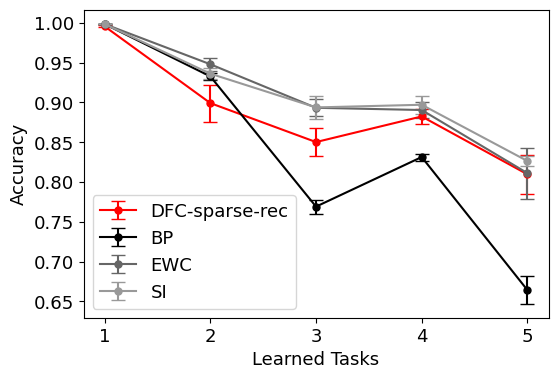

In [48]:
plt.style.use('grayscale')
plt.gcf().patch.set_facecolor('white')
min_accu_str = '-min-accu' if min_accu_eval else ''
for name, filename in filenames.items():
    results = pd.read_csv(os.getcwd() + f'/../out/hpsearches-final/{SUBDIR}/{filename}{min_accu_str}/search_results.csv', delimiter=';')
    if name == 'EWC':
        results = results[results['reg_coef'] == 100000]
    elif name == 'SI' and cl_mode == 'domain':
        results = results[results['reg_coef'] == 10]
    elif name == 'SI' and cl_mode == 'class':
        results = results[results['reg_coef'] == 100]
    accuracies = np.zeros((5,5))
    
    for i in range(5):
        if min_accu_eval:
             accuracies[i,:] = [float(x) for x in eval(results[results['stop_early_at_accu'] == stop_accu]['task_test_accu'].iloc[i]).split(',')]
        else:
            accuracies[i,:] = [float(x) for x in eval(results[results['lr'].round(8) == round(lrs[name], 8)]['task_test_accu'].iloc[i]).split(',')]
    
    means = np.mean(accuracies, axis=0)
    stds = np.std(accuracies, axis=0)
    
    plt.errorbar(range(1, 6), means, yerr=stds, label=name, color=('red' if name=='DFC-sparse-rec' else None),
                 fmt='-o', markersize=5, capsize=5)

plt.xticks(range(1, 6), range(1, 6), fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.xlabel('Learned Tasks', fontsize=FONTSIZE)
plt.ylabel('Accuracy', fontsize=FONTSIZE)
plt.legend(prop={'size': FONTSIZE})
plt.savefig(f'{FIG_DIR}{cl_mode=}-acc-vs-tasks.svg', format='svg', bbox_inches = "tight")